# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Supervised Learning - Thera Bank Project

## <font color=#00b3e5> Import all the Python Libraries

In [1114]:
#Enable graph plotting in Jupyter
%matplotlib inline

In [1115]:
# Numerical libraries
import numpy as np  
# to handle data in form of rows and columns 
import pandas as pd    


# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
# Import Logistic Regression machine learning library
from sklearn.linear_model import LogisticRegression

#import train test split 
from sklearn.model_selection import train_test_split
#import confusion_matrix
from sklearn.metrics import confusion_matrix



# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

#importing KNN Classifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

#importing KFold and Cross validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#importing Recall and accuracy metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score


## <font color=#00b3e5> Understanding the attributes of the dataset:

### Read and Display the Columns/Attributes and their Description

In [1116]:
#This will print the entire text in the description column
pd.set_option('display.max_colwidth',100) 
#Read the data from the column description file
attributes_df=pd.read_excel('TheraBank_Column_Description.xlsx',skiprows=7,usecols=[1,2],header=None,names=['Attribute','Descripton'])
#Print the attributes/columns and the respective descriptions
print (attributes_df.to_string(index = False))


          Attribute                                                                   Descripton
                 ID                                                                  Customer ID
                Age                                            Customer's age in completed years
         Experience                                            #years of professional experience
             Income                                         Annual income of the customer ($000)
            ZIPCode                                                       Home Address ZIP code.
             Family                                                  Family size of the customer
              CCAvg                               Avg. spending on credit cards per month ($000)
          Education         Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
           Mortgage                                       Value of house mortgage if any. ($000)
      Personal Loan     Did th

## <font color=#00b3e5> Read the Thera Bank dataset

In [1117]:
bank_df=pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
#Print few records to look at the data
bank_df.head(10) 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


### Print Column Types

In [1118]:
bank_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

## <font color=#00b3e5> Observations on the data types:

##### Apart from the CCAvg (Average Spending of the month, Float Type), all other columns are of type integer. 
##### However, Columns: Securities Account, CD Account, Online, CreditCard are binary categorical attributes with values as 0 or 1. 
##### Column Education is also an ordinal categorical column with three classes 1: Undergrad; 2: Graduate; 3: Advanced/Professional
##### Column ZIP Code is also a categorical column
##### On the other hand, Age, Experience, Income, Family are discrete numerical columns
##### CCAvg can have continuous numerical values

### Print Dataset Size

In [1119]:
bank_df.shape

(5000, 14)

### Check for imbalance in the dataset with respect to "Personal Loan" column

#### 0: People who didn't opt for Personal Loan
#### 1: People who opted for Personal Loan

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000236D8571548>],
      dtype=object)

<Figure size 80x80 with 0 Axes>

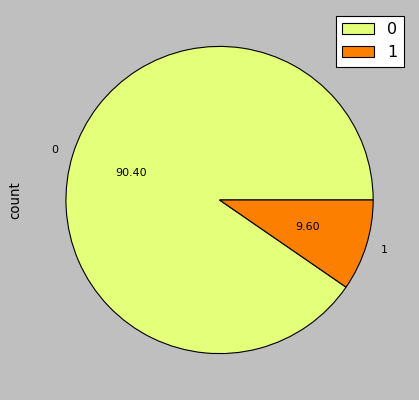

In [1120]:
pl.figure(figsize = (1,1))
cols= pd.crosstab(index=bank_df["Personal Loan"],columns="count")
cols.plot(kind='pie',subplots=True,legend=True,fontsize=10,autopct='%.2f',colormap ='Wistia')

## <font color=#00b3e5>Data Cleaning

### Check for Null Values

In [1121]:
bank_df.apply(lambda x: sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### No Null values present

### Check for NaN Values

In [1122]:
bank_df.apply(lambda x: sum(x.isna()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### No NaN values present

#### Since we didn't find any missing values, we will proceed now with model building

## <font color=#00b3e5>Data Preparation before we build a model

###### Column "ID" is just a serial number assigned to the records in the dataset and doesn't have any value addition to the Model building.  We should drop such non useful columns. However, it is important to first check if there is any gap in the serial numbers. If there is a significant jump from one number to the next, then this can be an issue of missing recorded data and has to be futher analyzed.

In [1123]:
# drop the Column ID
bank_df = bank_df.drop('ID',axis=1)
bank_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


###### For Categorical variables, if represented in the form of serial numbers can be misinterpreted as ranked values. so it is important to convert them into correct form. 
##### This is a two step process. In the first step, we will assign the actual labels to the Column "Education" values and in the next step, we will perform an One hot encoding to convert each of this labels into seperate columns with classifier as 0 or 1.

In [1124]:
# Replace the numbers in categorical variables with the actual Education Level names in the origin col
bank_df['Education'] = bank_df['Education'].replace({1:'Undergrad',2:'Graduate',3:'Advanced'})
bank_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1


In [1125]:
# Convert categorical variable into dummy/indicator variables.
bank_df = pd.get_dummies(bank_df,columns=['Education'])

In [1126]:
bank_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Graduate,Education_Undergrad
0,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0,1
1,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0,1
2,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0,1
3,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


##### Three new columns added: Education_Advanced, Education_Graduate & Education_Undergrad
##### One should be careful while using hot encoding methods. Large number of attributes can result into curse of dimensionality

## <font color=#00b3e5>Descriptive statistics of the Dataset

In [1127]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


## <font color=#00b3e5>Study the data distribution in each attribute

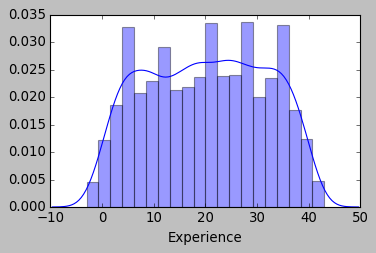

In [1128]:
sns.distplot(bank_df['Experience'])
fig=plt.gcf()
fig.set_size_inches(5,3)

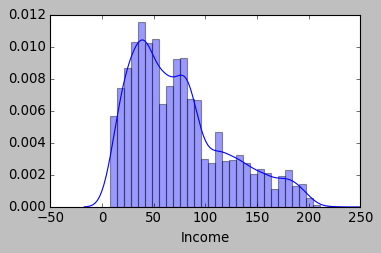

In [1129]:
sns.distplot(bank_df['Income'])
fig=plt.gcf()
fig.set_size_inches(5,3)

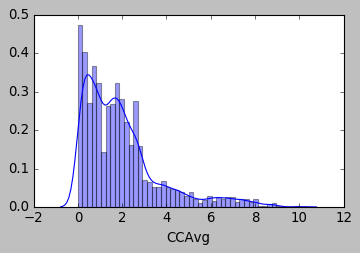

In [1130]:
sns.distplot(bank_df['CCAvg'])
fig=plt.gcf()
fig.set_size_inches(5,3)

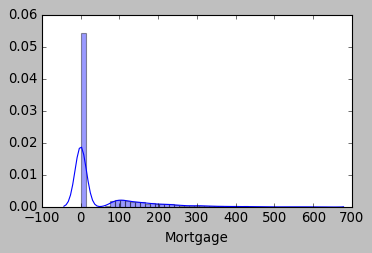

In [1131]:
sns.distplot(bank_df['Mortgage'])
fig=plt.gcf()
fig.set_size_inches(5,3)

#### Find out count of Zero (Label:0), Positive (Label:1) and Negative (Label:2) values for the below Numeric attributes

In [1132]:
bank_df[["Age","Experience","Income","CCAvg", "Mortgage"]].apply(lambda x: pd.Series([(x == 0).sum(), (x > 0).sum(), (x<0).sum()]))

,Age,Experience,Income,CCAvg,Mortgage
0,0,66,0,106,3462
1,5000,4882,5000,4894,1538
2,0,52,0,0,0


### <font color=#00b3e5> Inferences about each attribute:

###### 1) Experience has a min of -3, which means we  have records with experience (in years) as negative. This might be wrong data. Let us find out how many such records exists.

In [1133]:
bank_df[bank_df['Experience']<0].count()[0]

52

##### Check unique values of column "Personal Loan" for these 52 records. We want to check if there is any record with wrong experience data who has opted for a personal loan. 
##### This will ensure that if we drop these records, will this impact our overall model accuracy or not?

In [1134]:
bank_df[bank_df['Experience']<0]['Personal Loan'].unique()

array([0], dtype=int64)

##### So no customer amongst these records has opted for the personal loan. However, we are not going to drop these 52 records now, and will see the results of Pair Plot, first.
##### Another possible way to handle negative experience values is to replace them with their respective absolute values.

##### 2) ZIP Code is a categorical variable and doesn't add any valuable information to our model. However, for all such attributes, we would still run the pair plot graph before dropping them.

##### 3) Income and CCAvg are both positively skewed

## <font color=#00b3e5>Pair Plot Analysis

C:\Users\sense\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sense\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


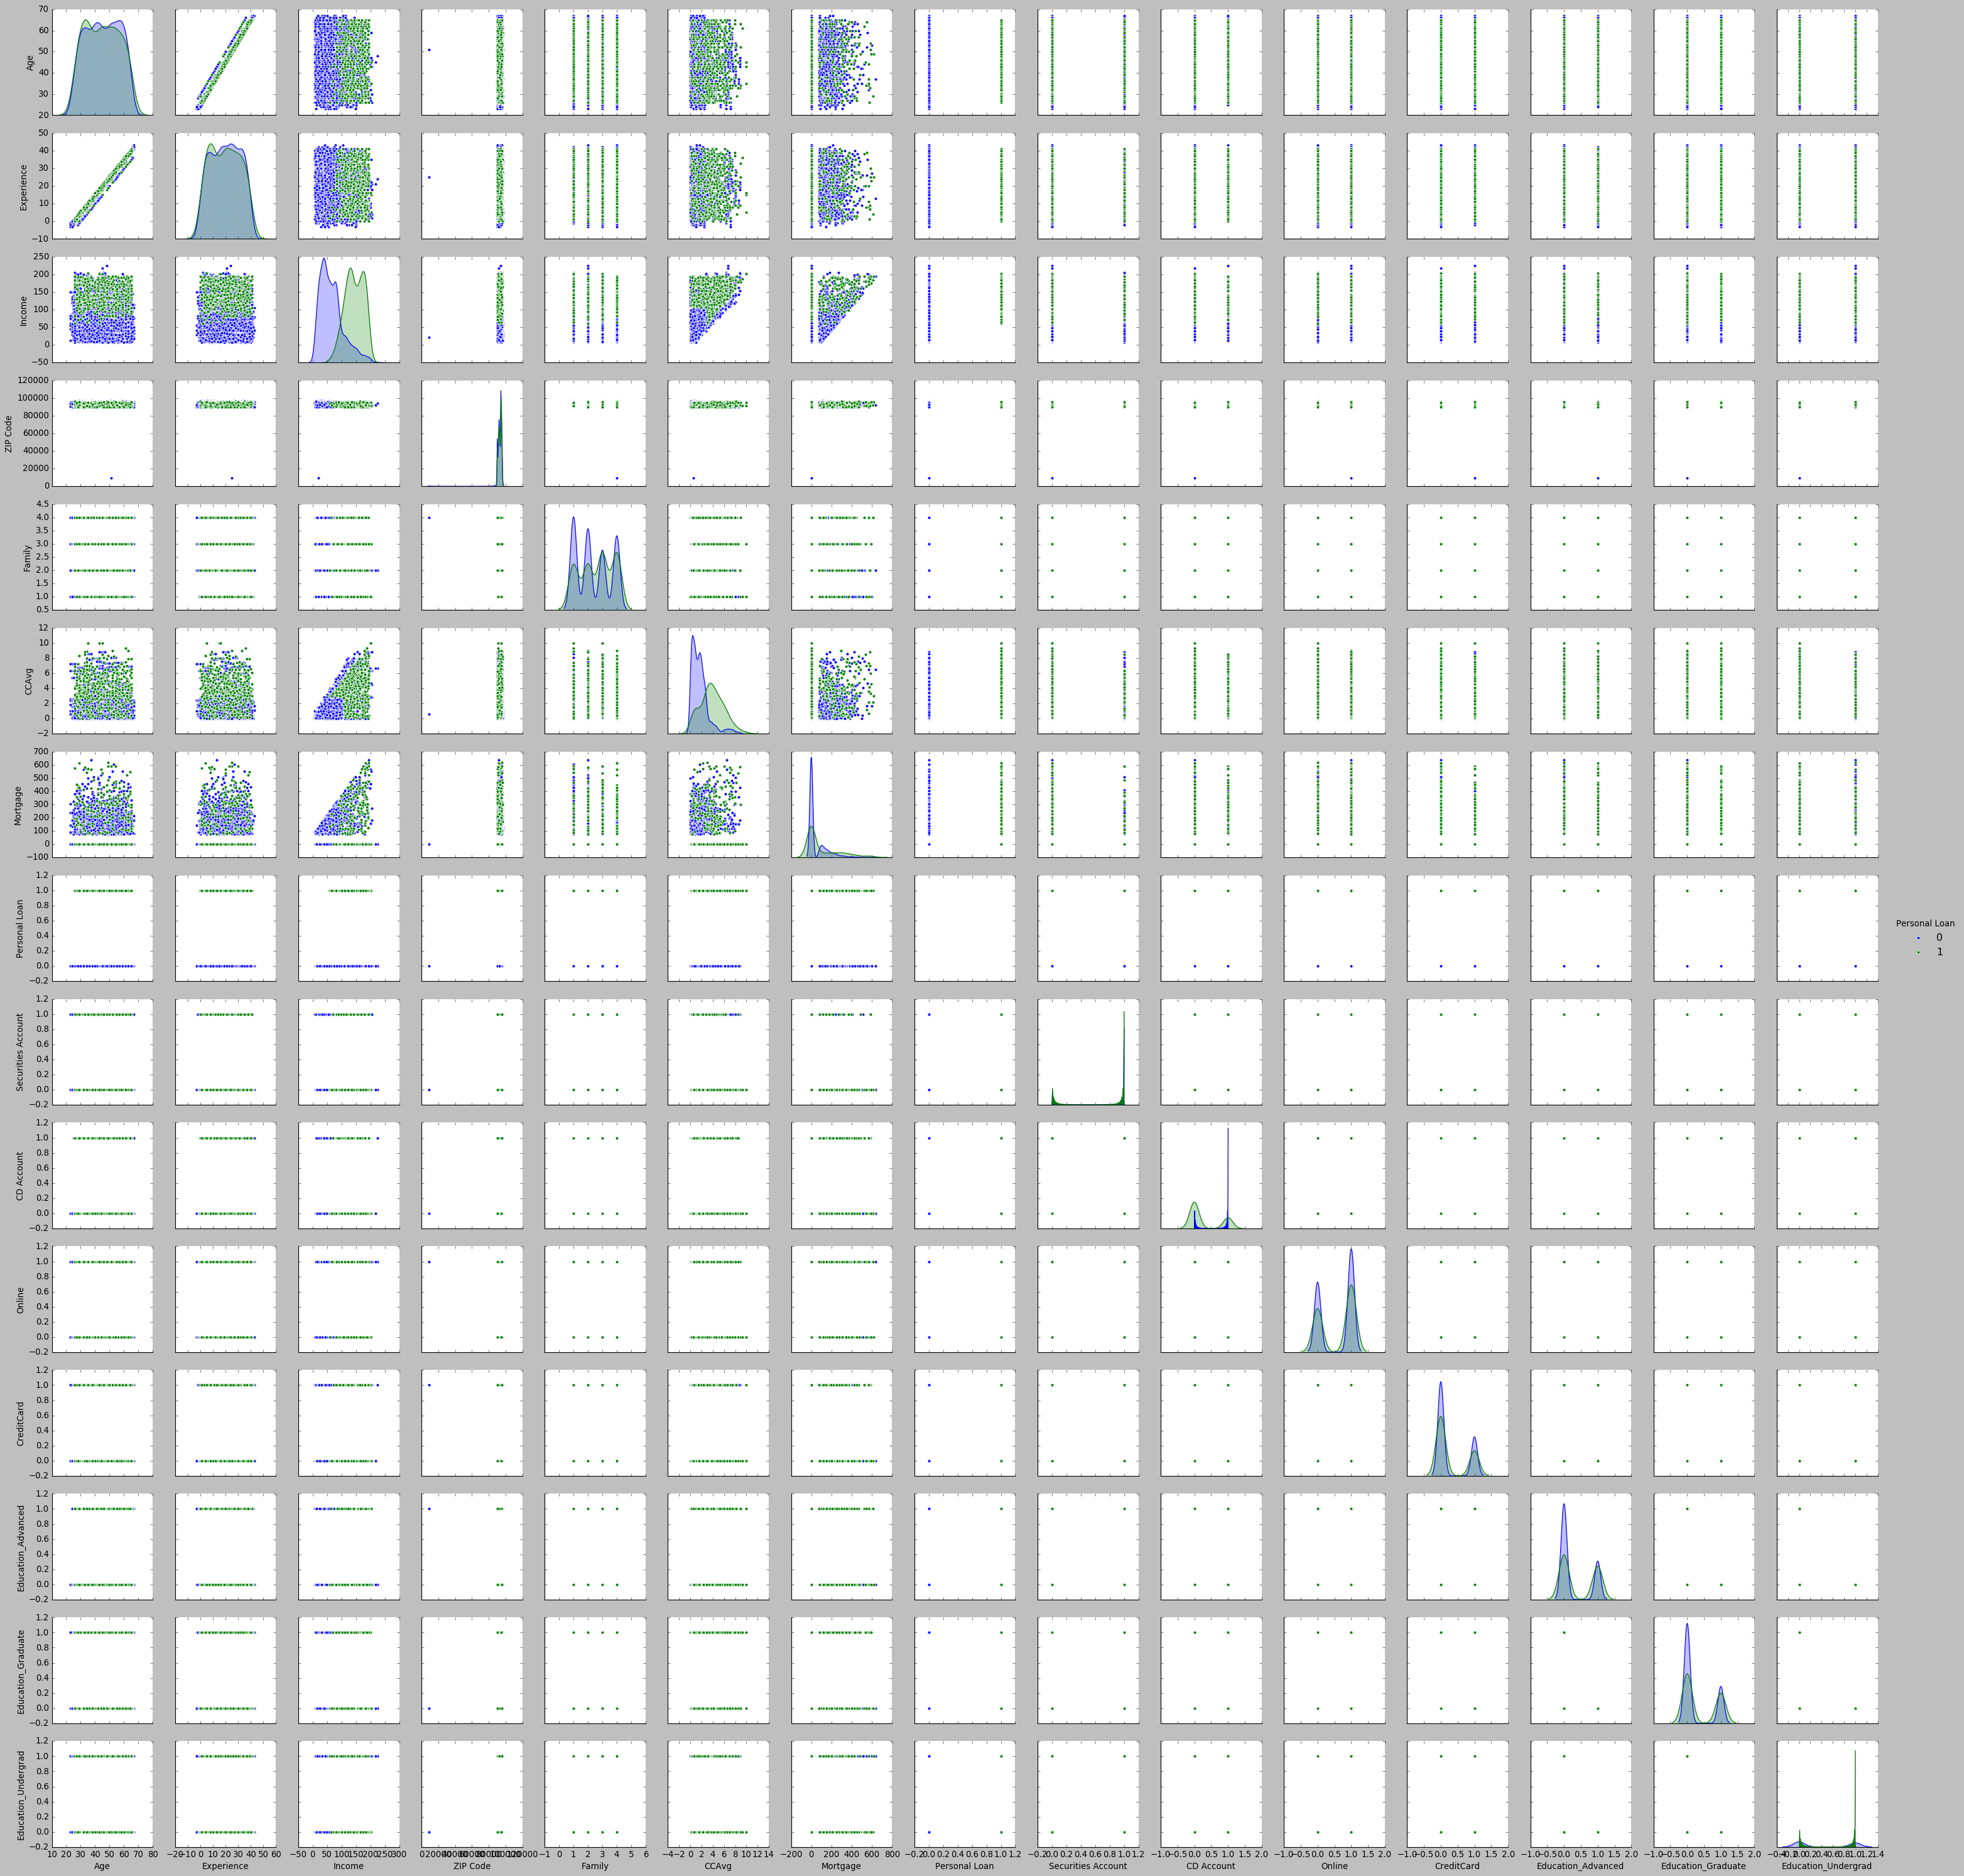

In [1135]:
sns.pairplot(data=bank_df, diag_kind = "kde", hue="Personal Loan")

<Figure size 1200x800 with 0 Axes>

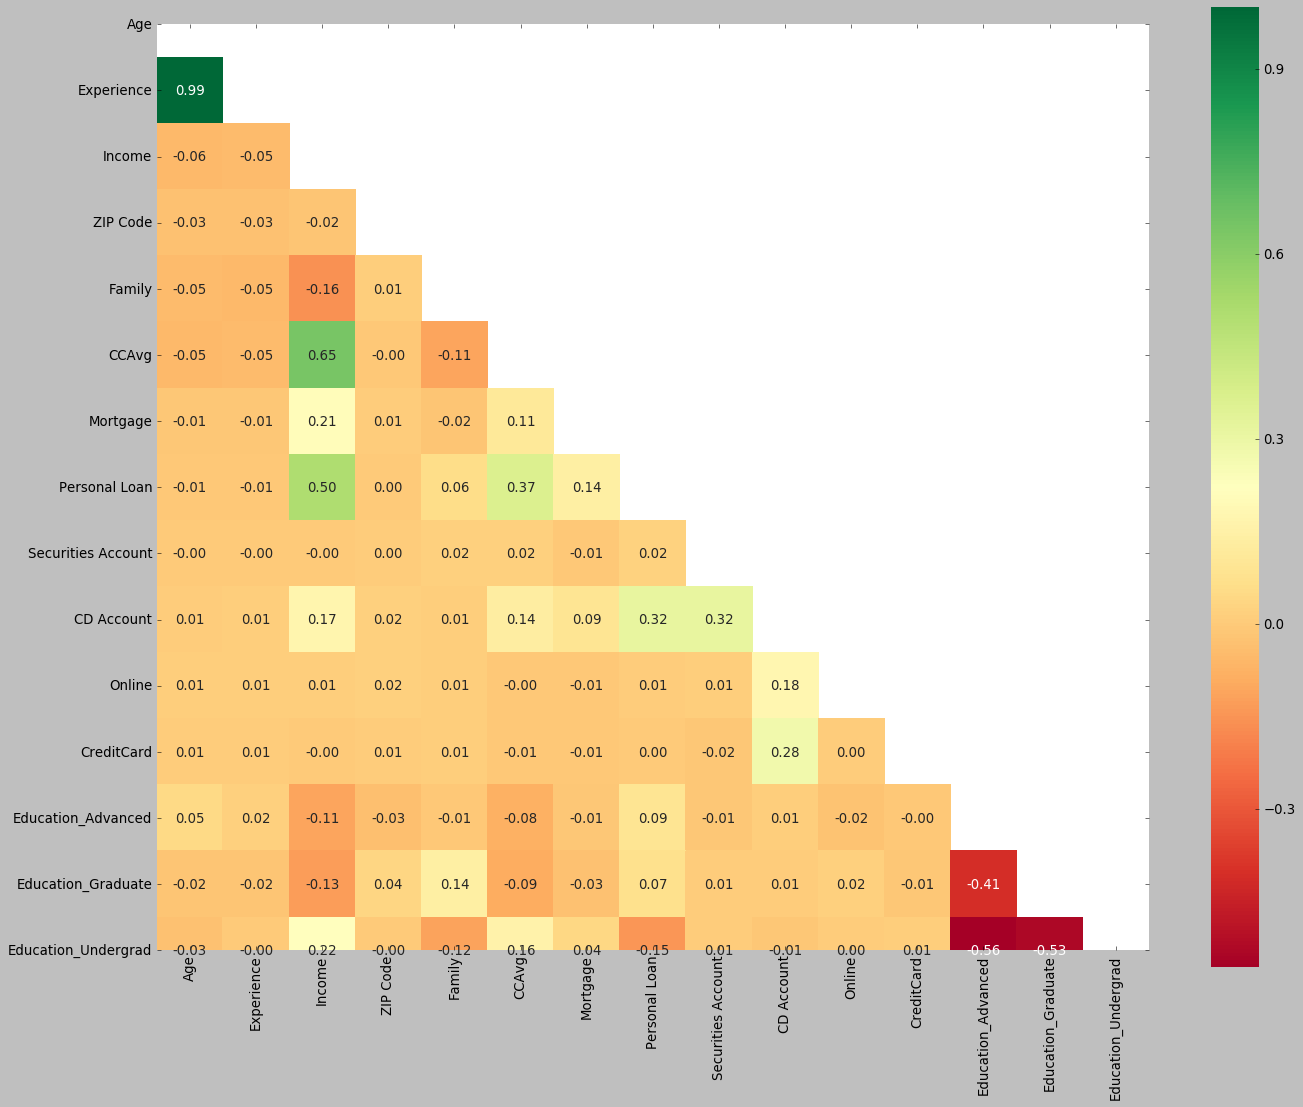

In [1136]:
import pylab as pl
pl.figure(figsize = (15,10))

corr = bank_df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,15))
sns.heatmap(corr, mask=mask,annot=True,square=True, fmt='0.2f',cmap='RdYlGn')

### <font color=#00b3e5> Inferences drawn from Pair Plot 

#### 1) Age and Experience are highly correlated. Because as Age increases, obviously Experience increases, hence we can say one of the columns is redundant to the model
#### 2) Looking at the pair plot, Income is a very good attribute for classification as its seperates out the two classes
#### 3) On the other hand, CCAvg is also a faily good attribute for classification
#### 4) Strong positive correlation between CCAvg and Income (r = 0.65)
#### 5) Strong positive correlation between Personal Loan and Income (r = 0.50)
#### 6) Fairly good positive correlation between Personal Loan and CCAvg (r = 0.37)


# <font color=#00b3e5>**********Model Building**********

##### The class of interest in this case, are those people who have opted for the Personal Loan in the last campaign. 
##### Generally, the class of interest (or also called as not normal class) is denoted with Label 1 and has lesser number of records

In [1137]:
bank_df.groupby(["Personal Loan"]).count()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Graduate,Education_Undergrad
Personal Loan,,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480,480


### Get the target column distribution

In [1138]:
# splitting data into training and test set for independent attributes

X =  bank_df.drop("Personal Loan", axis=1)
y =  bank_df.pop("Personal Loan")

In [1139]:
X.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Graduate,Education_Undergrad
0,25,1,49,91107,4,1.6,0,1,0,0,0,0,0,1
1,45,19,34,90089,3,1.5,0,1,0,0,0,0,0,1
2,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,1
3,35,9,100,94112,1,2.7,0,0,0,0,0,0,1,0
4,35,8,45,91330,4,1.0,0,0,0,0,1,0,1,0


##### We are building this model to determine the likeliness of bank customers to opt for a loan. Hence the column "Personal Loan", which basically depicts the data of distribution of people who have opted for loan in the previous campaign, is our target column.

### Split the data into training and test set in the ratio of 70:30 respectively

In [1140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [1141]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 14) (1500, 14) (3500,) (1500,)


## <font color=#00b3e5>Logistic Regression

### <font color=#00b3e5>Iteration 1

#### Fit the model in the training data set

In [1142]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\sense\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Calculate model score on the train set

In [1143]:
model.score(X_train, y_train)

0.9091428571428571

#### Calculate model score on the test set

In [1144]:
LR=model.score(X_test, y_test)
LR

0.9073333333333333

#### Confusion matrix on the Test set

In [1145]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
y_predict = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))


[[1318   33]
 [ 106   43]]


#### Print Recall,Precision and Accuracy

In [1146]:
print('Recall Score',recall_score(y_test, y_predict))
print('Precision :',precision_score(y_test, y_predict))
print('Accuracy :',accuracy_score(y_test, y_predict))

recall_LR=recall_score(y_test, y_predict)
prec_LR=precision_score(y_test, y_predict)

Recall Score 0.28859060402684567
Precision : 0.5657894736842105
Accuracy : 0.9073333333333333


<Figure size 640x480 with 0 Axes>

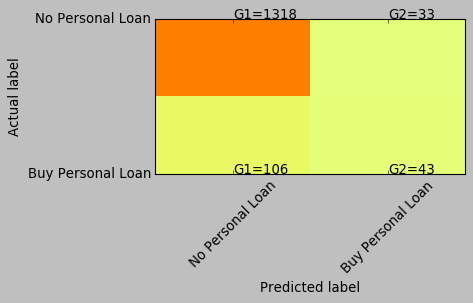

In [1147]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No Personal Loan','Buy Personal Loan']
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

s = [['G1', 'G2'], ['G1','G2']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+str(cm[i][j]))
plt.show()

### <font color=#00b3e5>Iteration 2

### Rebuild the Model without the Age (as it is highly correlated with experience) and the Zip Code

In [1148]:
# dropping both Age and Zip code
X1 =  bank_df.drop(["Age","ZIP Code"], axis=1)

#### Split the data into training and test set in the ratio of 70:30 respectively

In [1149]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.30, random_state=1)

#### Fit the model in the training data set

In [1150]:
model.fit(X1_train, y_train)

C:\Users\sense\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Calculate model score on the test set

In [1151]:
LR=model.score(X1_test, y_test)
LR

0.956

#### Confusion matrix on the Test set

In [1152]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
y_predict = model.predict(X1_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[1342    9]
 [  57   92]]


#### Print Recall,Precision and Accuracy

In [1153]:
print('Recall Score',recall_score(y_test, y_predict))
print('Precision :',precision_score(y_test, y_predict))
print('Accuracy :',accuracy_score(y_test, y_predict))

recall_LR=recall_score(y_test, y_predict)
prec_LR=precision_score(y_test, y_predict)

Recall Score 0.6174496644295302
Precision : 0.9108910891089109
Accuracy : 0.956


<Figure size 640x480 with 0 Axes>

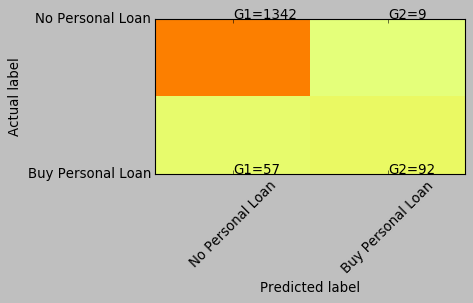

In [1154]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No Personal Loan','Buy Personal Loan']
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

s = [['G1', 'G2'], ['G1','G2']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+str(cm[i][j]))
plt.show()

#### There is a significant improvement in the model score in Iteration 2

### <font color=#00b3e5>Iteration 3

### Replace the Experience column having negative values, with the mean of the Experience column

In [1155]:
X1[["Experience"]].apply(lambda x: pd.Series([(x == 0).sum(), (x > 0).sum(), (x<0).sum()]))

,Experience
0,66
1,4882
2,52


In [1156]:
Array_without_negative = X1[X1["Experience"]>0]["Experience"]
mean=Array_without_negative.mean()

In [1157]:
X1["Experience"]=X1["Experience"].replace([-1,-2,-3],mean)

In [1158]:
X1[["Experience"]].apply(lambda x: pd.Series([(x == 0).sum(), (x > 0).sum(), (x<0).sum()]))

,Experience
0,66
1,4934
2,0


#### Fit the model in the training data set

In [1159]:
model.fit(X1_train, y_train)

C:\Users\sense\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [1160]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
y_predict = model.predict(X1_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[1342    9]
 [  57   92]]


<Figure size 640x480 with 0 Axes>

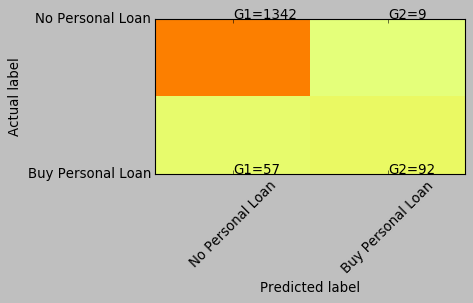

In [1161]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No Personal Loan','Buy Personal Loan']
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

s = [['G1', 'G2'], ['G1','G2']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+str(cm[i][j]))
plt.show()

#### Calculate model score on the test set

In [1162]:
LR=model.score(X1_test, y_test)
LR

0.956

#### Print Recall,Precision and Accuracy

In [1163]:
print('Recall Score',recall_score(y_test, y_predict))
print('Precision :',precision_score(y_test, y_predict))
print('Accuracy :',accuracy_score(y_test, y_predict))

recall_LR=recall_score(y_test, y_predict)
prec_LR=precision_score(y_test, y_predict)

Recall Score 0.6174496644295302
Precision : 0.9108910891089109
Accuracy : 0.956


#### There is no difference after Iteration 3.

### <font color=#00b3e5>MNLogit Regression Results   

In [1164]:
import statsmodels.api as sm

X1_train = X1_train.apply(lambda x: x.fillna(x.median()),axis=1)

mdl = sm.MNLogit(y_train, X1_train).fit()

print(mdl.summary())

Optimization terminated successfully.
         Current function value: 0.114091
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                        MNLogit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Tue, 07 Apr 2020   Pseudo R-squ.:                  0.6355
Time:                        01:30:23   Log-Likelihood:                -399.32
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                5.557e-292
    Personal Loan=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Experience              0.0055      0.008      0.673      0.501      -0.010       0.021
In

##### Null hypothesis(Ho) says that the coefficient should be 0. However, the standard error signifies that the coefficient is not 0. 
##### How much far away it is from 0, is given by z value. This means larger the z value, the less likely the coefficient is 0.
##### Ho states that the datapoints are symmetrically distributed in universe, however, in real world the sample gives a squashed bell curve. The probability of getting a symmetric distribution assuming Ho is true (conditional probability) is given by the p value.


## <font color=#00b3e5>Naive Bayes

### <font color=#00b3e5>Iteration 1

#### Fit the model in the training data set

In [1165]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X1_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### Calculate model score on the test set

In [1166]:
NB=model.score(X1_test , y_test)      # performance on test data
NB

0.8866666666666667

#### Print Recall,Precision and Accuracy

In [1167]:
test_pred = model.predict(X1_test)
print('Recall Score',recall_score(y_test, test_pred))
print('Precision :',precision_score(y_test, test_pred))
print('Accuracy :',accuracy_score(y_test, test_pred))

recall_NB=recall_score(y_test, test_pred)
prec_NB=precision_score(y_test, test_pred)

Recall Score 0.5838926174496645
Precision : 0.4461538461538462
Accuracy : 0.8866666666666667


##### Naive Bayes ignores the multicollinearity between the attributes.
##### Let us check the class level accuracy and the confusion matrix

In [1168]:
print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1351
           1       0.45      0.58      0.51       149

    accuracy                           0.89      1500
   macro avg       0.70      0.75      0.72      1500
weighted avg       0.90      0.89      0.89      1500

[[1243  108]
 [  62   87]]


#### We see quite a few misclassifications here. The possible reason for this can be that there are lot of categorical attributes with values as zeroes and ones. In this case, the model will assign a 0 probability and will be unable to make a prediction.

<Figure size 640x480 with 0 Axes>

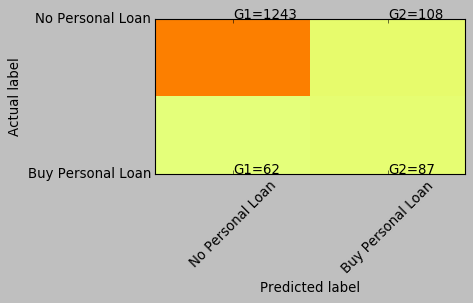

In [1169]:
cm = metrics.confusion_matrix(y_test, test_pred)
plt.clf()
plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No Personal Loan','Buy Personal Loan']
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

s = [['G1', 'G2'], ['G1','G2']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+str(cm[i][j]))
plt.show()

### Naive Bayes with K fold cross validation

In [1170]:
scores = cross_val_score(model, X1_train, y_train, cv=10)
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

Cross-validated scores: [0.89173789 0.90285714 0.88857143 0.87142857 0.88857143 0.90571429
 0.88571429 0.91142857 0.90285714 0.91690544] [0.89173789 0.90285714 0.88857143 0.87142857 0.88857143 0.90571429
 0.88571429 0.91142857 0.90285714 0.91690544]
Average score: 0.8965786193006823


### <font color=#00b3e5>Iteration 2

##### What we are trying to do is that choose the columns from the dataset which are not binary categorical, in order to avoid 0 values.

In [1171]:
bank_df_NB_X=pd.read_csv('Bank_Personal_Loan_Modelling-1.csv',usecols=['Experience','Income','Family','CCAvg','Education'])
bank_df_NB_y=pd.read_csv('Bank_Personal_Loan_Modelling-1.csv',usecols=['Personal Loan'])

#### Split the data into train and test

In [1172]:
X1_train, X1_test, y_train, y_test = train_test_split(bank_df_NB_X, bank_df_NB_y, test_size=0.30, random_state=1)

#### Fit the model in the training data set

In [1173]:
model = GaussianNB()
model.fit(X1_train, y_train)

C:\Users\sense\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

#### Calculate model score on the test set

In [1174]:
NB=model.score(X1_test , y_test)  
NB

0.896

#### Print Recall,Precision and Accuracy

In [1175]:
test_pred = model.predict(X1_test)
print('Recall Score',recall_score(y_test, test_pred))
print('Precision :',precision_score(y_test, test_pred))
print('Accuracy :',accuracy_score(y_test, test_pred))

recall_NB=recall_score(y_test, test_pred)
prec_NB=precision_score(y_test, test_pred)

Recall Score 0.4899328859060403
Precision : 0.477124183006536
Accuracy : 0.896


#### Print the confusion matrix

In [1176]:
test_pred = model.predict(X1_test)

print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1351
           1       0.48      0.49      0.48       149

    accuracy                           0.90      1500
   macro avg       0.71      0.72      0.71      1500
weighted avg       0.90      0.90      0.90      1500

[[1271   80]
 [  76   73]]


<Figure size 640x480 with 0 Axes>

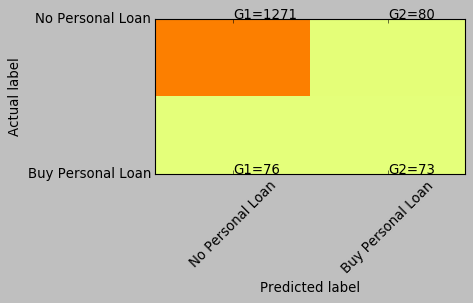

In [1177]:
cm = metrics.confusion_matrix(y_test, test_pred)
plt.clf()
plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No Personal Loan','Buy Personal Loan']
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

s = [['G1', 'G2'], ['G1','G2']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+str(cm[i][j]))
plt.show()

##### We see a slight improvement here in the class level accuracy. But we might be throwing away important information with all the ignored attributes

### Naive Bayes with K fold cross validation

In [1178]:
scores = cross_val_score(model, X1_train, y_train, cv=10)
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

Cross-validated scores: [0.91452991 0.91714286 0.9        0.9        0.92571429 0.92
 0.90285714 0.89714286 0.92       0.92550143] [0.91452991 0.91714286 0.9        0.9        0.92571429 0.92
 0.90285714 0.89714286 0.92       0.92550143]
Average score: 0.9122888490051814


C:\Users\sense\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sense\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sense\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sense\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

## <font color=#00b3e5> KNN Classification

##### Whenever we use distance calculation methods, we always convert the attributes into z scores, otherwise the differences in the attributes' scales will affect the calculated distances.


In [1179]:
X1_z = X1.apply(zscore)  # convert all attributes to Z scale 

##### Generally when we have hyperparameters (k, in this case), we split our dataset into three parts : Train, Test and Validation. In this scenario, we are just spliting into train and test, because of the limited size of our dataset

In [1180]:
seed = 7  # Random numbmer seeding for reapeatability of the code
X1_train, X1_test, y_train, y_test = train_test_split(X1_z, y, test_size=0.30, random_state=seed)

#### Fit the model in the training data set

In [1181]:
NNH = KNeighborsClassifier(n_neighbors= 3)

NNH.fit(X1_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

##### When we call the predict function and supply the X1_test to it, it takes the test record one by one and runs it against all the train set records and identifies the k(=3, here) nearest neighbours

In [1182]:
predicted_labels = NNH.predict(X1_test)
KNN=NNH.score(X1_test, y_test)
KNN

0.9686666666666667

#### Confusion Matrix

In [1183]:
# calculate accuracy measures and confusion matrix
print(pd.DataFrame(metrics.confusion_matrix(y_test, predicted_labels, labels=[1 ,0]), index=['true:yes', 'true:no'], columns=['pred:yes', 'pred:no']))

          pred:yes  pred:no
true:yes        97       41
true:no          6     1356


<Figure size 640x480 with 0 Axes>

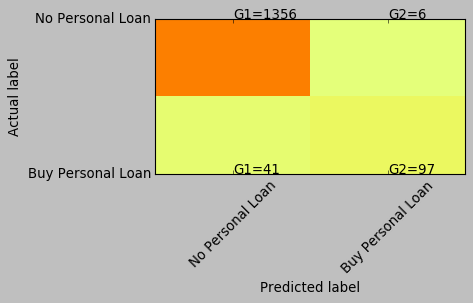

In [1184]:
cm = metrics.confusion_matrix(y_test, predicted_labels)
plt.clf()
plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No Personal Loan','Buy Personal Loan']
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

s = [['G1', 'G2'], ['G1','G2']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"="+str(cm[i][j]))
plt.show()

#### Print Recall,Precision and Accuracy

In [1185]:
print('Recall Score',recall_score(y_test, predicted_labels))
print('Precision Score',precision_score(y_test, predicted_labels))
print('Accuracy :',accuracy_score(y_test, predicted_labels))

recall_KNN=recall_score(y_test, predicted_labels)
prec_KNN=precision_score(y_test, predicted_labels)

Recall Score 0.7028985507246377
Precision Score 0.941747572815534
Accuracy : 0.9686666666666667


### K fold cross validation

##### I want to split the dataset randomly into 10 pieces. Now, each of this sets will be validated against rest 9 sets in the first cycle and so on.

In [1186]:

# creating odd list of K for KNN
myList = list(range(1,50))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X1_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)

#### Print the Cross Validation scores

In [1187]:
cv_scores

[0.96256887461472,
 0.9557116944394881,
 0.9637125410936299,
 0.9568512769200449,
 0.961424361481668,
 0.9545680046367726,
 0.9585671999654807,
 0.9508504395954253,
 0.9548553562536372,
 0.9494210495012787,
 0.9519990273973082,
 0.9474251241701097,
 0.9485687953137811,
 0.945711647791877,
 0.947996543412016,
 0.9439965340824941,
 0.9462838903641195,
 0.9425704093211257,
 0.9442855183657477,
 0.9425704093211257,
 0.9451442985540407,
 0.9422838810345974,
 0.9437140897943191,
 0.9419965294177327,
 0.9425687766547366,
 0.941997348083308,
 0.941997348083308,
 0.939998976084936,
 0.9405695906555506,
 0.9397124477984077,
 0.9402838763698362,
 0.9385695859907894,
 0.9394267288479323,
 0.9377116198033104,
 0.9382830530394999,
 0.9365679486596392,
 0.9368552956117426,
 0.936283048374739,
 0.936283048374739,
 0.9359973340890246,
 0.9357116198033104,
 0.9354259055175961,
 0.9359965200882107,
 0.9345695766612673,
 0.93542671951841,
 0.9337132478049384,
 0.9348552909469815,
 0.9331418192335098,
 0.9

#### Find out the optimal value of K for which we get the least Misclassification Error

In [1188]:
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 3


#### Plot  Misclassification Error along K on X-axis

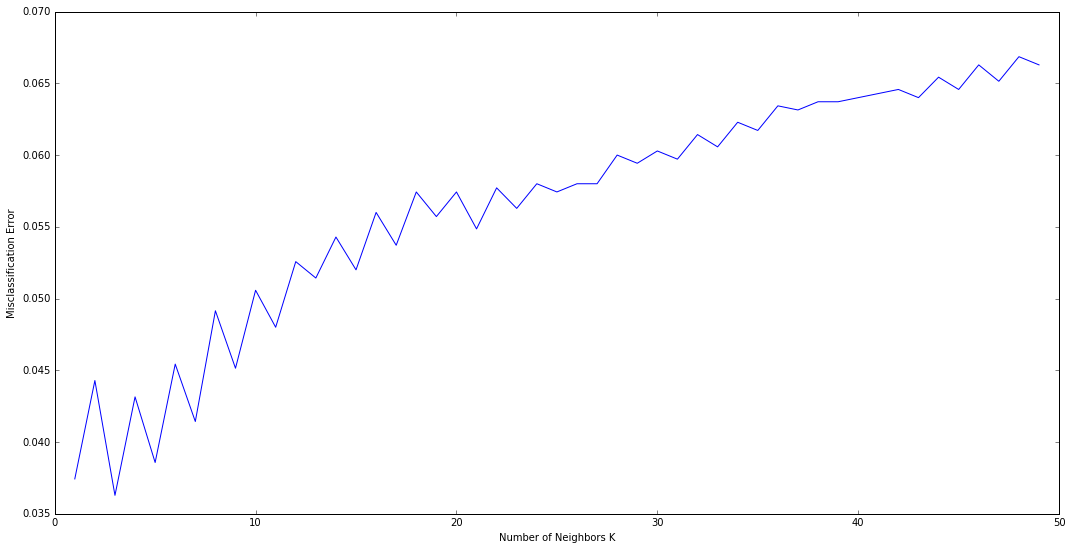

In [1189]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,50)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

##### As K increases, the MSE also increase. Lets take a closer look.

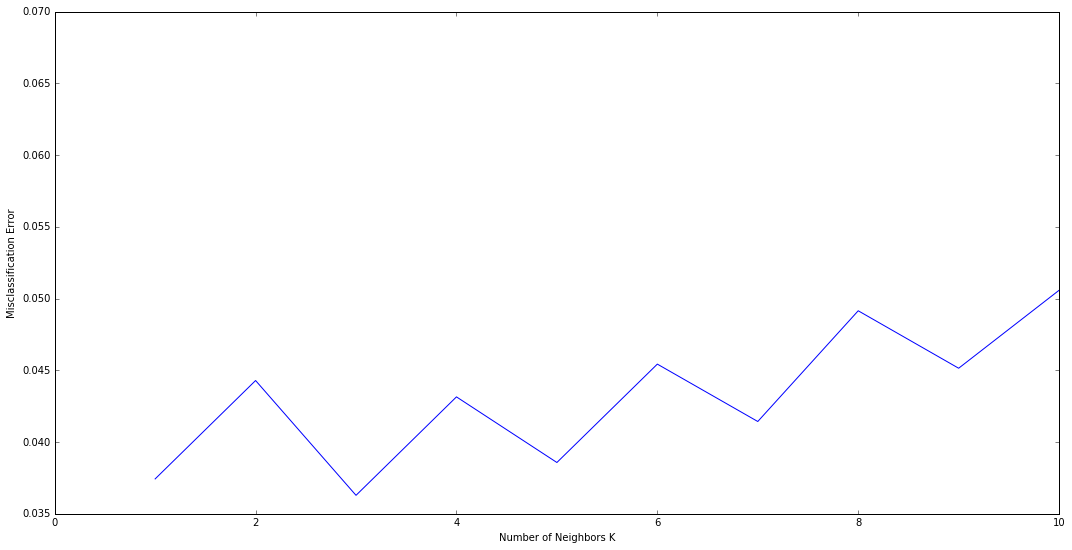

In [1190]:
plt.xlim(0,10)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

##### As we see, K=3 has the minima of the Error curve

## <font color=#00b3e5> Comparison of three algorithms: Logistic Regression, KNN and Naive Bayes

In [1191]:
compare_algo_df=pd.DataFrame({'Algorithm':['Logistic Regression', 'Naive Bayes', 'K Nearest Neighbour'], 
                              'Model Scores':[LR, NB, KNN],'Recall':[recall_LR,recall_NB,recall_KNN],'Precision':[prec_LR,prec_NB,prec_KNN]}) 
compare_algo_df

,Algorithm,Model Scores,Recall,Precision
0,Logistic Regression,0.956000,0.617450,0.910891
1,Naive Bayes,0.896000,0.489933,0.477124
2,K Nearest Neighbour,0.968667,0.702899,0.941748


#### 1) KNN gives the maximum accuracy score. However, accuracy of a model is important when all classes are equally important to us. Accuracy mainly tell us the proportion of correct predictions (TP + TN) over total predictions (TP + FP + TN + FN)
#### 2) In most of the scenarios, we need to decide which one to give more importance : Recall or Precision? For instance, what is the cost of denying a loan to a good customer vs the cost of offering a loan to a bad customer.
#### 3) For studies, where the class of interest is the "Defaulter" class, we may want to have a high recall.
#### 4) In this case, we want to identify potential buyers, so we want to go for an algorithm which gives us a good precision percentage. KNN has the highest precision of 94%.

### KNN seems to be the best classifier for this model.